**Stock Market Data Analysis 🚀🚀🚀 🌑🌑🌑**


1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

In [29]:
#import dataframe and visualization libraries 

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [3]:
#read in stonks, timestamps, and division 

import pandas_datareader.data as web
from datetime import datetime
from __future__ import division

In [4]:
#list of stonks

moon = ['GME', 'TSLA', 'AMC', 'MSFT']

In [5]:
#timeframe

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [6]:
#read in the stocks from yahoo and list defined previously
for stonk in moon:
    globals()[stonk] = web.DataReader(stonk, 'yahoo',start,end)

In [7]:
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,493.718286,468.574627,481.986223,482.389777,5.464979e+07,482.389777
std,225.345426,216.121567,221.322260,221.287812,3.049651e+07,221.287812
min,152.399994,136.608002,140.199997,140.264008,1.515770e+07,140.264008
25%,306.807007,292.149994,298.901009,299.037987,3.267455e+07,299.037987
50%,446.115005,424.395004,437.500000,432.414993,4.570135e+07,432.414993
75%,694.910004,659.442490,677.477509,674.060013,7.132590e+07,674.060013
max,900.400024,871.599976,891.380005,883.090027,2.221262e+08,883.090027


In [8]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-04-27 to 2021-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

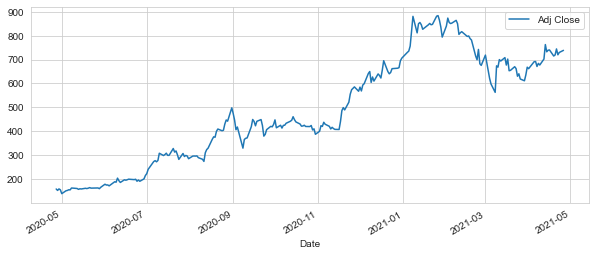

In [9]:
TSLA['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

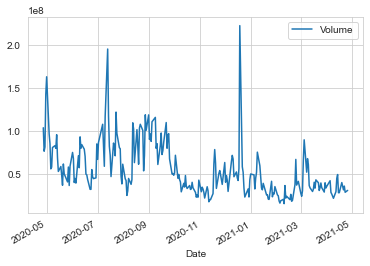

In [10]:
TSLA['Volume'].plot(legend = True)

In [11]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    TSLA[column_name] = TSLA['Adj Close'].rolling(ma).mean()

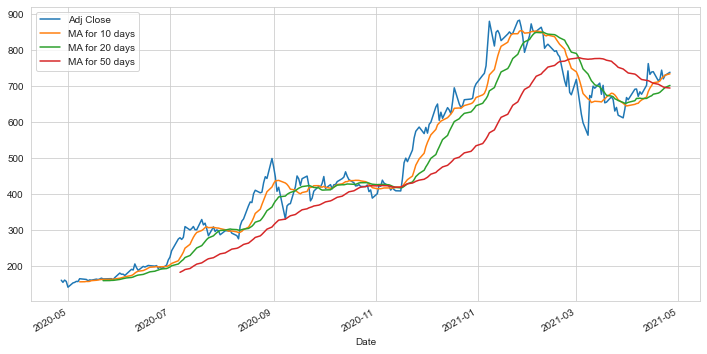

In [12]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

#false is get them all on one plot instead of seperate plots

<AxesSubplot:xlabel='Date'>

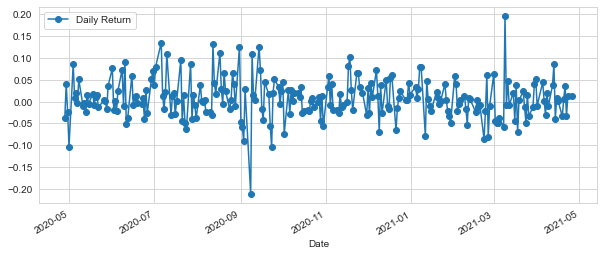

In [13]:
#on a given day, what was your percent return of money. 
#daily return on average using seaborn 

TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()
TSLA['Daily Return'].plot(figsize = (10,4), legend = True, linestyle ='-',marker = 'o')
                                    

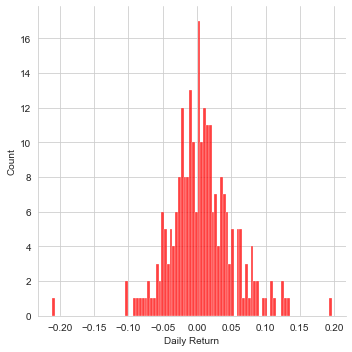

In [14]:
sns.displot(TSLA['Daily Return'].dropna(), bins=100, color='red')
plt.show()

<AxesSubplot:>

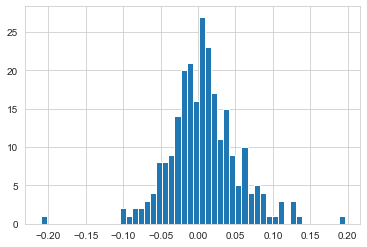

In [15]:
#pandas histogram

TSLA['Daily Return'].hist(bins=50)

In [16]:
#create a new data frame called closing_df

closing_df = web.DataReader(moon, 'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

Symbols,GME,TSLA,AMC,MSFT
Date,,,,
2020-04-27,5.82,159.750000,3.36,172.299103
2020-04-28,5.64,153.824005,4.14,168.101730
2020-04-29,6.04,160.102005,5.19,175.645081
2020-04-30,5.73,156.376007,4.92,177.407196
2020-05-01,6.05,140.264008,4.57,172.813858


In [18]:
returns = closing_df.pct_change()

In [19]:
returns.head()

Symbols,GME,TSLA,AMC,MSFT
Date,,,,
2020-04-27,NaN,NaN,NaN,NaN
2020-04-28,-0.030928,-0.037095,0.232143,-0.024361
2020-04-29,0.070922,0.040813,0.253623,0.044874
2020-04-30,-0.051324,-0.023273,-0.052023,0.010032
2020-05-01,0.055846,-0.103034,-0.071138,-0.025891


c:\users\hwaja\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


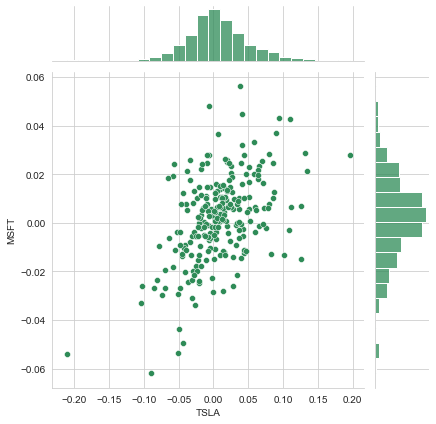

In [20]:
#compare tsla vs msft. 
#joinplot shows relationship between 2 variables

sns.jointplot('TSLA','MSFT', returns, kind='scatter', color = 'seagreen')
plt.show()

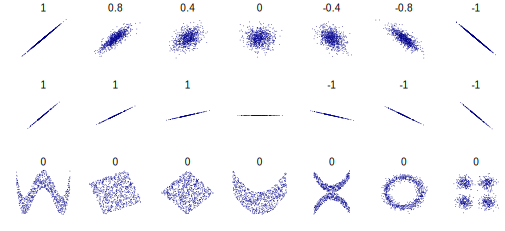

In [21]:
#reference file for correlation

from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

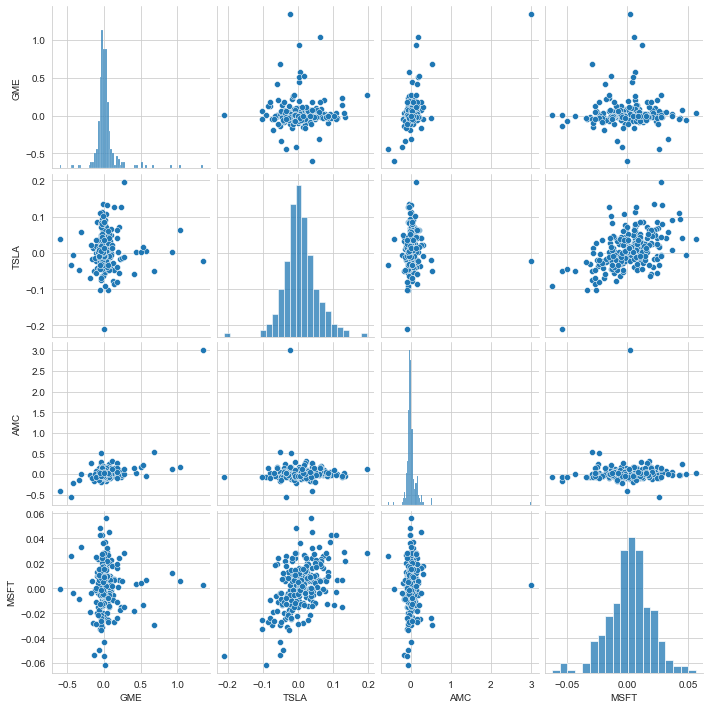

In [22]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(returns.dropna())
plt.show()


In [23]:
returns.head

<bound method NDFrame.head of Symbols          GME      TSLA       AMC      MSFT
Date                                              
2020-04-27       NaN       NaN       NaN       NaN
2020-04-28 -0.030928 -0.037095  0.232143 -0.024361
2020-04-29  0.070922  0.040813  0.253623  0.044874
2020-04-30 -0.051324 -0.023273 -0.052023  0.010032
2020-05-01  0.055846 -0.103034 -0.071138 -0.025891
...              ...       ...       ...       ...
2021-04-20 -0.035530  0.006101 -0.039337 -0.001855
2021-04-21 -0.000126  0.034952  0.053879  0.008983
2021-04-22 -0.046306 -0.032831  0.021472 -0.013086
2021-04-23  0.000066  0.013492  0.017017  0.015476
2021-04-26  0.117410  0.012065  0.131890  0.001532

[252 rows x 4 columns]>

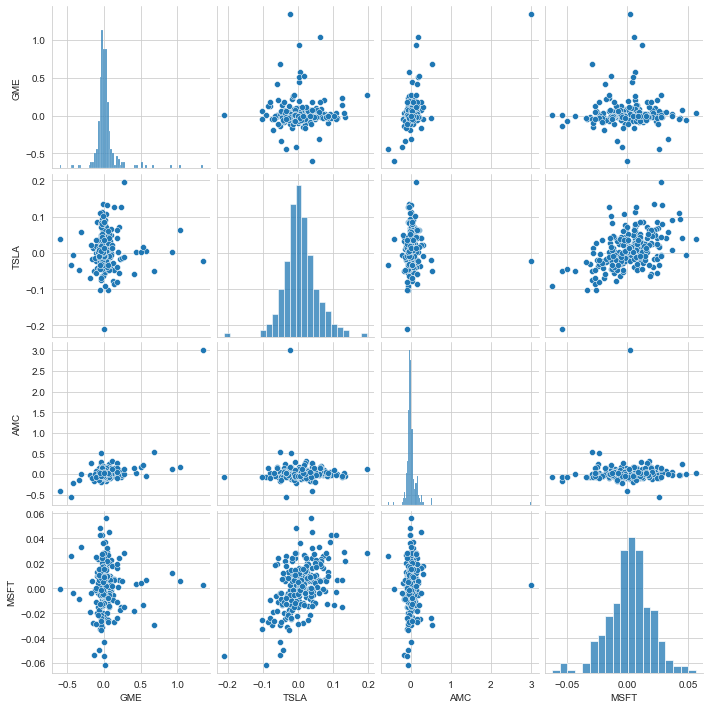

In [24]:
#pairplot - histagram, correlation graphs
sns.pairplot(returns.dropna())

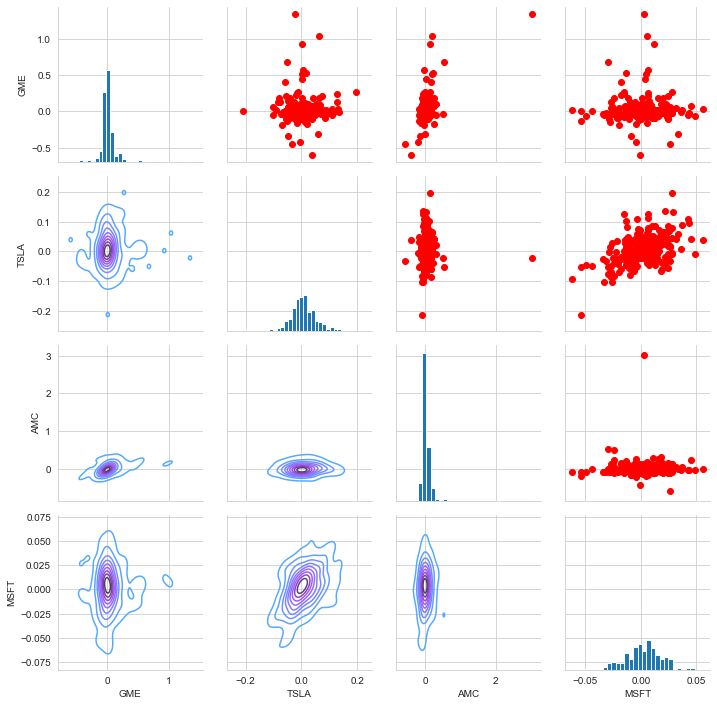

In [25]:
#custom pairgrid
returns_fig = sns.PairGrid(returns.dropna())
returns_fig.map_upper(plt.scatter, color='red')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

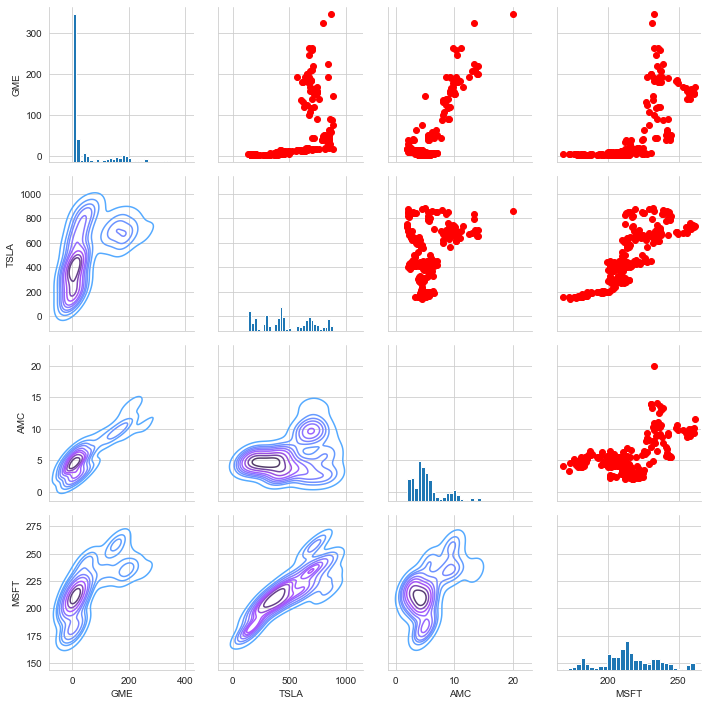

In [26]:
#correlation based on closing prices

returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='red')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

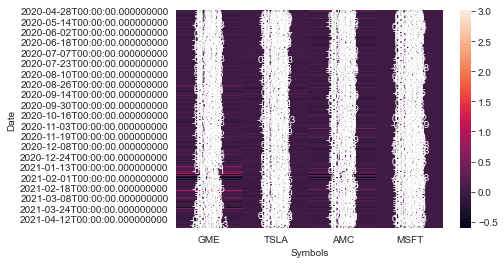

In [31]:
sns.heatmap(returns.dropna(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

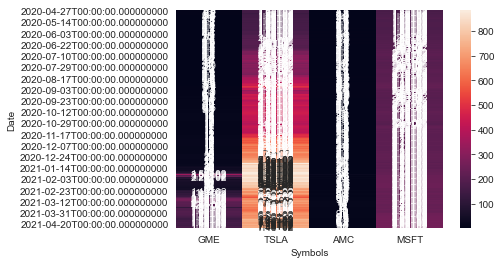

In [32]:
sns.heatmap(closing_df.dropna(),annot=True)